# Chapter 2.6

In this notebook, we explore the content of Chapter 2.6 by introducing three fundamental time-series models: the Autoregressive (AR), Moving Average (MA), and Autoregressive Moving Average (ARMA) models. Our aim is to provide an intuitive and practical overview of these classical approaches rather than to rigorously compare their performance out of sample. To illustrate these models in action, we will simulate some return data and highlight how AR, MA, and ARMA models capture and explain time-dependent structure in financial data. By the end of this notebook, you should have a clear understanding of how to implement these models and interpret their outputs. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf


In [3]:
ret = np.random.normal(0,1, 1000)

df = pd.DataFrame(ret, columns=['return'])

### AR(p)
In order to choose the p of a AR process, we look at the PACF plot. We look for a sharp cutoff after p lags (i.e., significant partial autocorrelations up to lag p, then close to zero after that).

### MA(q)
For a MA process with q order, we look at the ACF plot. If you see a clear cutoff after lag q, that suggests an MA(q) process.

### ARMA(p,q)
We look at both PACF and ACF plots. A partial cutoff in the ACF (not purely a single step, but a few significant lags) might indicate an MA component. A partial cutoff in the PACF might indicate an AR component.

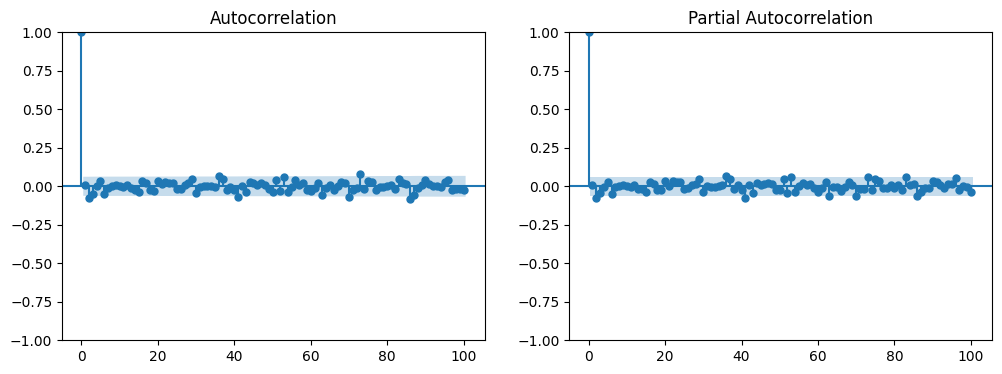

In [4]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_acf(df['return'], lags=100, ax=ax[0])   # ACF
plot_pacf(df['return'], lags=100, ax=ax[1]) # PACF
plt.show()

In [5]:
def get_AR(data, p, test_data):
  arma_model = ARIMA(data, order=(p, 0, 0))
  arma_result = arma_model.fit()
  predictions = arma_result.predict(start=test_data.index[0], end=test_data.index[-1])
  return arma_result, predictions

def get_MA(data, q, test_data):
  arma_model = ARIMA(data, order=(0, 0, q))
  arma_result = arma_model.fit()
  predictions = arma_result.predict(start=test_data.index[0], end=test_data.index[-1])
  return arma_result, predictions

def get_ARMA(data, p, q, test_data):
  arma_model = ARIMA(data, order=(p, 0, q))
  arma_result = arma_model.fit()
  predictions = arma_result.predict(start=test_data.index[0], end=test_data.index[-1])
  return arma_result, predictions


In [6]:
train_size = int(len(df)*0.9)
train_data = df['return']
test_data  = df['return'].iloc[train_size:]

model_ar, pred_ar = get_AR(train_data, p=2, test_data=test_data)
model_ma, pred_ma = get_MA(train_data, q=2, test_data=test_data)
model_arma, pred_arma = get_ARMA(train_data, p=2, q=3, test_data=test_data)



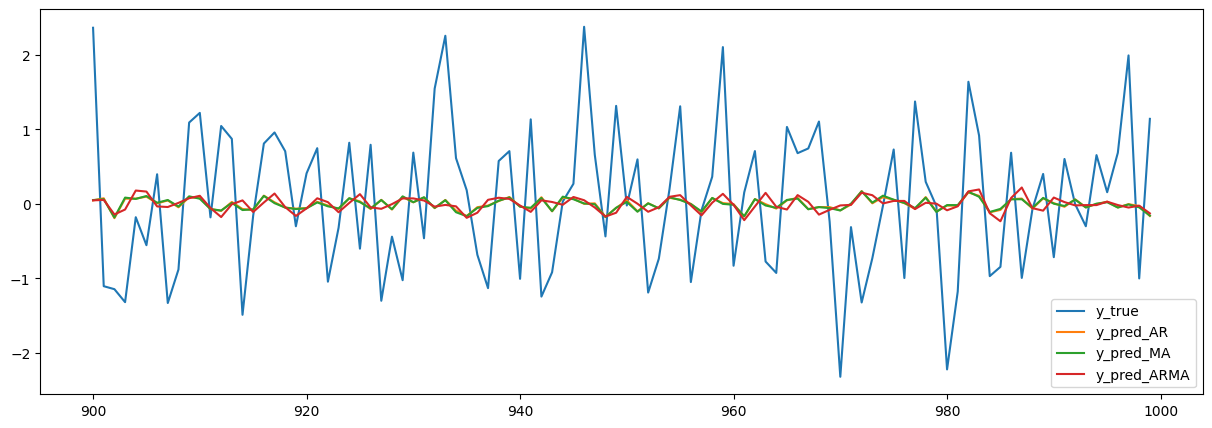

In [7]:
plt.figure(figsize=(15,5))
plt.plot(test_data, label='y_true')
plt.plot(pred_ar, label='y_pred_AR')
plt.plot(pred_ma, label='y_pred_MA')
plt.plot(pred_arma, label='y_pred_ARMA')
plt.legend()
